In [1]:
import os,sys,glob,re
import pandas as pd
import numpy as np
from mylab.ana.miniscope.context_exposure.Cminiana import MiniAna as MA

In [17]:
def generate_columns(session):
    mouse_id = re.findall("Results_(\d+)",session)[0]
    part = re.findall("part(\d+)",session)[0]
    session_num = re.findall("session(\d+).pkl",session)[0]

    
    s = MA(session)
    if not s.exp == "hc":
        video_name = s.result["behavevideo"][0]
        aim = re.findall(r"CDC-(.*)-%s"%mouse_id,video_name)[0]
        index=re.findall("\d{8}-\d{6}",video_name)[0]
    else:
        aim="hc"
        index="00000000-000000"
    
    return mouse_id,part,session_num,aim,index


In [2]:
    file_pathes1 = glob.glob(r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part*")
    file_pathes2 = glob.glob(r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part*")
    file_pathes3 = glob.glob(r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part*")
    file_pathes4 = glob.glob(r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part*")
    file_pathes = file_pathes1+file_pathes2+file_pathes3+file_pathes4
    file_pathes

['\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part2-3',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part4',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part5',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part6',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part7',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201034-finish\\part1_20200721-20200724-Context_Discrimination',
 '\\\\10.10.46.135\\Lab_Me

In [3]:
sessions=[]
for file_path in file_pathes:
    print(os.path.dirname(file_path))
    sessions = sessions + glob.glob(os.path.join(file_path,"session*.pkl"))
sessions

\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\bat

['\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session1.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session2.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session3.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session4.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session5.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-finish\\part1\\session6.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\Results_201033-f

In [24]:
# save as csv
mouse_id=[]
part=[]
session_num=[]
aim=[]
index=[]
for session in sessions:
    mi,pa,se,ai,ind = generate_columns(session)
    print(ind)
    mouse_id.append(mi)
    part.append(pa)
    session_num.append(se)
    aim.append(ai)
    index.append(ind)


df = pd.DataFrame()
df["mouse_id"] = mouse_id
df["part"] = part
df["session"]=session_num
df["aim"]=aim
df["index"]=index

df.to_csv(r"C:\Users\qiushou\Desktop\context_map.csv")

\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish
\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\bat

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200728-134259
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part2-3\session3.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200728-135825
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Anal

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200818-133839
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part5\session15.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part5\session16.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part6\session17.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'behavevideoframe', 'is_in_context', 'Trial_Num', 'process', 'Context', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200831-172820
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part6\session18.pkl
loaded
dict_keys(['ms_ts', 'S_dff'

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'Trial_Num', 'process'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part7\session14.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'is_in_context', 'is_in_lineartrack', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200908-191153
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part7\session15.pkl


loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200721-191521
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part1_20200721-20200724-Context_Discrimination\session3.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200721-192649
FUN:: _load_session
loading \\

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'behavevideoframe', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200801-203108
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part2_3\session7.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part2_3\session8.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask'

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200811-144307
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part5\session5.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part5\session6.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'i

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points', 'behavevideoframe'])
default 'sigraw' is taken as original self.df
20200906-235058
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part7\session13.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201034-finish\part7\session14.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part1_20200721-20200724-Context_Discrimination\session9.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'behavevideoframe', 'is_in_context', 'Trial_Num', 'process', 'Context', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200724-132613
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part2_3\sessio

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part4_Context_Discrimination\session4.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200807-155913
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part4_Context_Discrimination\session5.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-00000

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'is_in_context', 'Trial_Num', 'process', 'Context', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200812-162810
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part5_6\session5.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part5_6\session6.pkl
loaded
dict_keys(['ms_ts', 'S_df

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'is_in_context', 'Trial_Num', 'process', 'Context', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200904-162143
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part7\session7.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206551-finish\part7\session8.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200804-131744
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part2_3\session14.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part2_3\session15.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_tra

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200805-131229
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part2_3_old\session16.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200805-132317
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200819-192354
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part5\session15.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part5\session16.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track',

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'is_in_context', 'Trial_Num', 'process', 'Context', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200823-201409
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part6\session5.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part6\session6.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 

loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'is_in_context', 'Trial_Num', 'process', 'Context', 'Body_speed', 'Body_speed_angle', 'Head_speed', 'Head_speed_angle', 'in_context_running_direction_Body', 'all_track_points'])
default 'sigraw' is taken as original self.df
20200904-154515
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part7\session7.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
00000000-000000
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_206552-finish\part7\session8.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 

In [4]:
def show_frame(session):
    mouse_id = re.findall("Results_(\d+)",session)[0]
    part = re.findall("part(\d+)",session)[0]
    session_num = re.findall("session(\d+).pkl",session)[0]
    
    s = MA(session)
    if not s.exp == "hc":
        video_name = s.result["behavevideo"][0]
        if  "adaptation" in video_name:
            aim = re.findall(r"CDC-(.*)-%s"%mouse_id,video_name)[0]
            index=re.findall("\d{8}-\d{6}",video_name)[0]
            print(mouse_id,part,session_num,index)
            s.show_behaveframe(tracking=False)
        else:
            print("session not choosed")
    else:
        print("session not choosed")

FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1\session1.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted'])
default 'sigraw' is taken as original self.df
session not choosed
press any key:
FUN:: _load_session
loading \\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\Results_201033-finish\part1\session2.pkl
loaded
dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavevideoframe', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'aligned_behave2ms', 'Trial_Num', 'process', 'all_track_points'])
default 'sigraw' is taken as original self.df
201033 1 2 20200721-201748
FUN::add_c_behavevideoframe
behavevideoframe has been there.


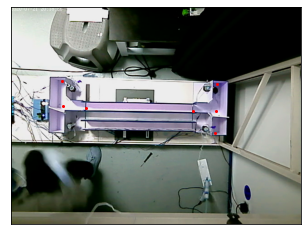

KeyboardInterrupt: Interrupted by user

In [7]:
for session in sessions:
    show_frame(session)
    
    